In [1]:
import matplotlib
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Iris dataset from sklearn livbrary
iris = load_iris()

In [3]:
# Show a small part of the dataset description
print(iris['DESCR'][:193] + '\n...')


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [4]:
# The input data (features) and output labels (targets)
print(iris['data'].shape)   # shape = (150 samples, 4 features)
iris['data'][:10]           # first 10 flowers measurements

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
# Train-test split: we use some data to train, some to test the model
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

In [6]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [7]:
# Visualize pairwise scatter plots between features
# Each point = one flower, colored by its species
fig, ax = plt.subplots(3, 3, figsize=(15,15))

In [8]:
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i+1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())

        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i+1])
        if j > i:
            ax[i, j].set_visible(False)

In [9]:
# Build a K-Nearest Neighbors model (k=1 means only the closest neighbor decides)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [10]:
# Try a new flower measurement
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction for new flower:", iris['target_names'][prediction][0])

Prediction for new flower: setosa


In [11]:
# Model accuracy on the test set
print("Model accuracy:", knn.score(X_test, y_test))


Model accuracy: 0.9736842105263158


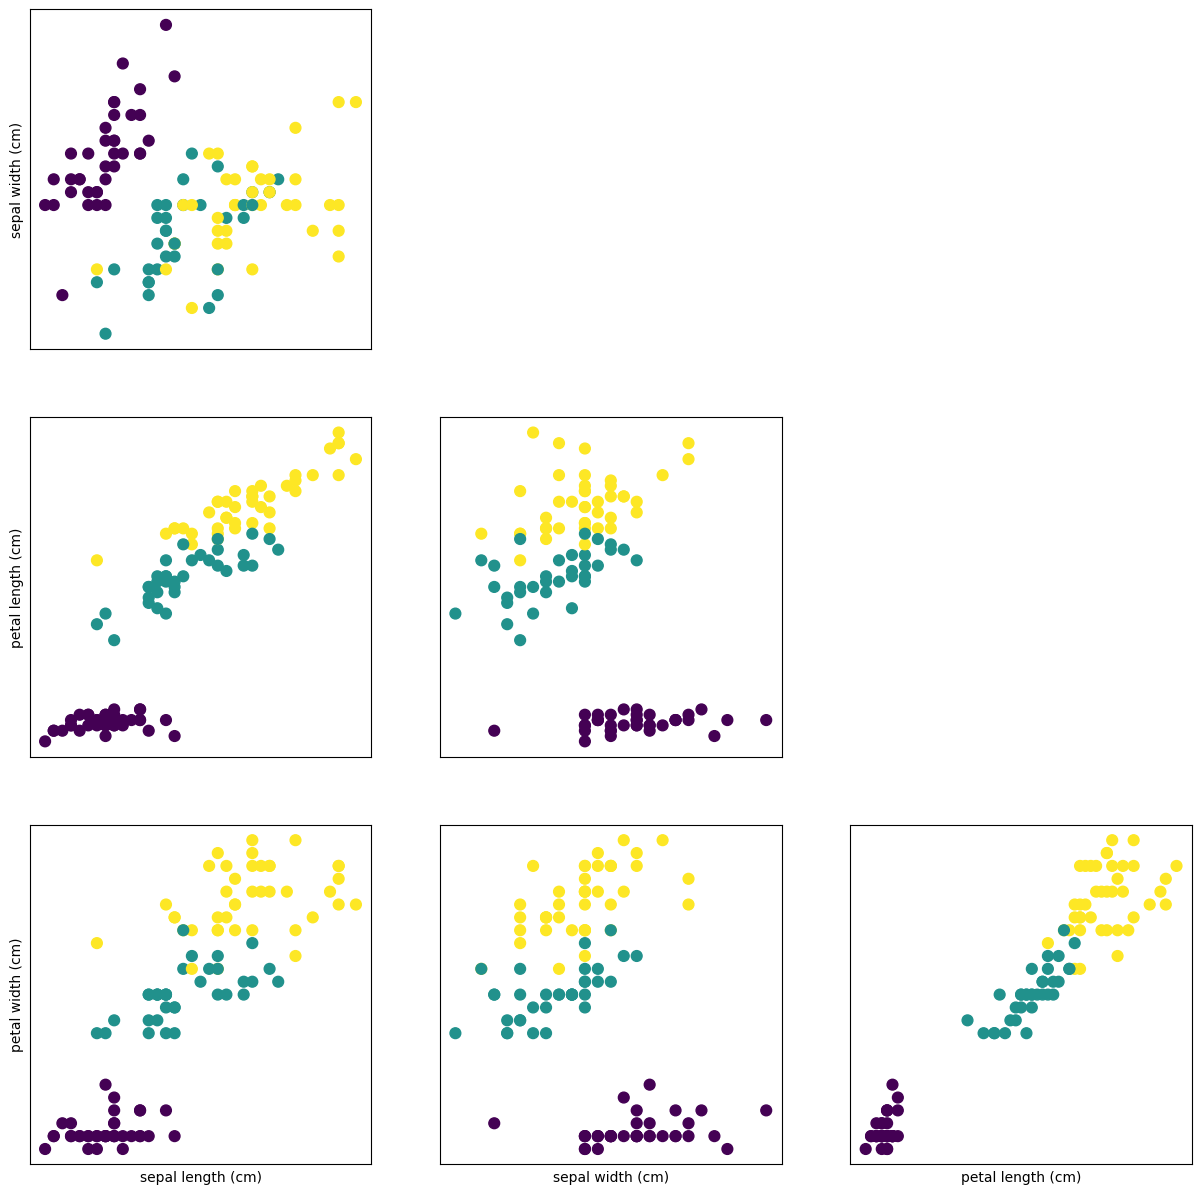

In [12]:
# Show the scatter plots
plt.show()